<a href="https://colab.research.google.com/github/titilomt/data_science_puc_projects/blob/master/tp_06_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP - 06 Machine Learning

Prof: Hugo Bastos de Paula

Aluno: Tiago Henrique Pereira Fonseca

## Objetivo

- Uma operadora de seguro de saúde sabe da forte influência do peso, gênero e nível de colesterol no desenvolvimento de doenças cardíacas. O objetivo dessa atividade é identificar perfis de indivíduos com maior risco para sobrepeso e colesterol alto.
- Para alcançar este objetivo, iremos utilizar o modelo agrupamento pelo algoritmo das K-Means. Então nosso objetivo se torna encontrar grupos de indivíduos (clusters) e definir os limites entre o grupo saudável e o grupo de risco.
- Esta atividade irá precisar da base de dados: Atividade 6 - [Saude.xlsx](https://github.com/titilomt/data_science_puc_projects/blob/master/csv/Atividade%206%20-%20Saude.xlsx?raw=true)

- A base de dados se chama Atividade 6 - saúde.xlsx, e possui os atributos peso, colesterol e gênero. Peso e colesterol são atributos numéricos. Na variável gênero, 1 corresponde ao sexo masculino e 0 ao feminino.



## Exercício

- Utilizando a K-means, realize a clustrização com k=2. Tende descrever os dois grupos gerados. Utilize as informações dos centroides dos clusteres para tentar diferenciar os dois grupos de risco.
- Vamos tentar encontrar 4 grupos distintos: alto risco possui colesterol e peso altos; baixo risco possui colesterol e peso baixos; e risco moderado possui apenas o peso ou apenas o colesterol altos. Verifique os resultados. Investigue a tabela de centroides e a visão dos dados, além dos gráficos. Defina quais são os limites de peso e de colesterol para que um indivíduo seja considerado paciente de risco.
- Observe que o atributo colesterol varia muito mais que o atributo peso, o que pode causar uma tendência do modelo de valorizar mais o colesterol do que os demais parâmetros. Faça a normalização dos dados e aplique a K-means


In [191]:
# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import math

import seaborn as sns


In [3]:
# LOAD DATA
# https://github.com/titilomt/data_science_puc_projects/blob/master/csv/Atividade%206%20-%20Saude.xlsx?raw=true

health = pd.read_excel('https://github.com/titilomt/data_science_puc_projects/blob/master/csv/Atividade%206%20-%20Saude.xlsx?raw=true')

In [4]:
health.head()

,Peso,Colesterol,Genero
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1


### Analise descritiva de nossa base

In [8]:
print("Info: ")
print(health.info())
print("Describe: ", health.describe(), sep='\n')

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Peso        547 non-null    int64
 1   Colesterol  547 non-null    int64
 2   Genero      547 non-null    int64
dtypes: int64(3)
memory usage: 12.9 KB
None
Describe: 
             Peso  Colesterol      Genero
count  547.000000  547.000000  547.000000
mean   143.572212  170.433272    0.513711
std     30.837275   39.147189    0.500269
min     95.000000  102.000000    0.000000
25%    116.000000  136.000000    0.000000
50%    140.000000  169.000000    1.000000
75%    171.000000  208.000000    1.000000
max    203.000000  235.000000    1.000000


In [9]:
# corr 
health.corr()

,Peso,Colesterol,Genero
Peso,1.000000,0.988593,0.006436
Colesterol,0.988593,1.000000,-0.010544
Genero,0.006436,-0.010544,1.000000


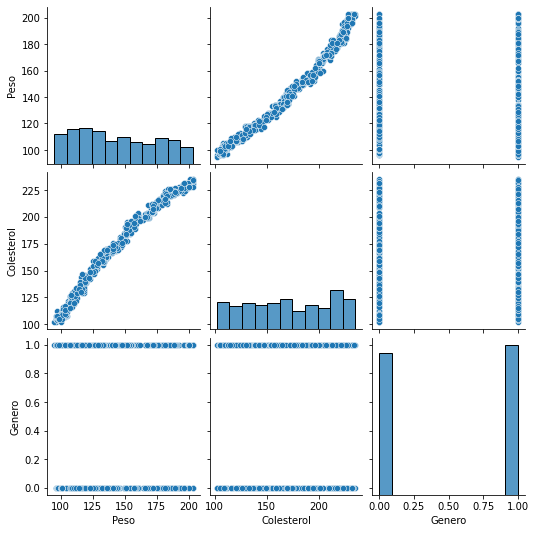

In [11]:
# plt graph
sns.pairplot(health)

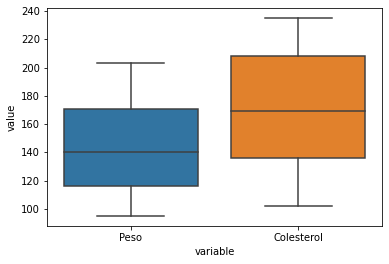

In [27]:
# boxplot
plot_health = health[['Peso', 'Colesterol']]
sns.boxplot(data=pd.melt(plot_health), x='variable', y='value')

In [186]:
X_scaled = StandardScaler().fit_transform(health)
n_samples = X.shape[0]
X_arr = np.array(health)

In [165]:
X = X_arr

estimator = KMeans(n_clusters=2, random_state=random_state)

model = estimator.fit(X)

y_pred = estimator.predict(X)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=170, tol=0.0001, verbose=0)

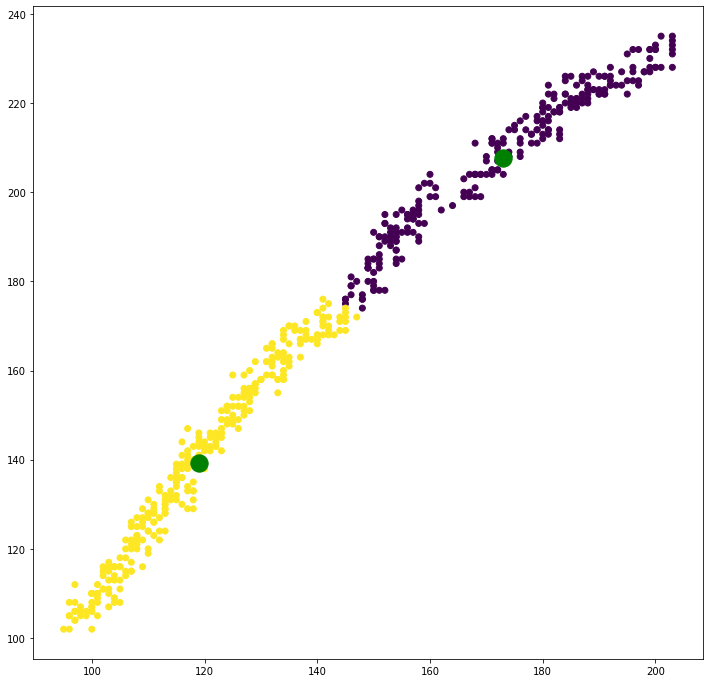

__________________________________________________________________________________
init		time	inertia	variance	silhouette
2 clusters	0.00s	330659	1690.14		0.631
Centroids [[172.89156627 207.63453815   0.55421687]
 [119.0738255  139.34899329   0.47986577]]


In [174]:
plt.figure(figsize=(12, 12))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

plt.scatter(estimator.cluster_centers_[:, 0], estimator.cluster_centers_[:, 1], s=300, c='green', label = 'Centroids')

plt.show()

labels = estimator.labels_

print(82 * '_')
print('init\t\ttime\tinertia\tvariance\tsilhouette')
print('%-9s\t%.2fs\t%i\t%.2f\t\t%.3f'
      % ('2 clusters', 0, estimator.inertia_,
              metrics.calinski_harabasz_score(X, labels),
              metrics.silhouette_score(X, labels,
                                       metric='euclidean',
                                       sample_size=n_samples)))  
print("Centroids", estimator.cluster_centers_)      

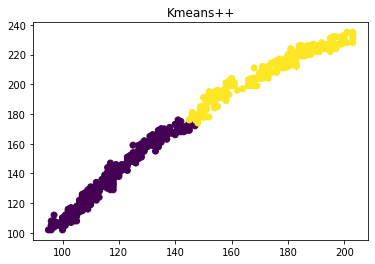

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.00s	330659	1.000	1.000	1.000	1.000	1.000	0.631
Centroids [[119.0738255  139.34899329   0.47986577]
 [172.89156627 207.63453815   0.55421687]]


In [175]:
# kmaens ++
estimator = KMeans(n_clusters=2, random_state=random_state, init='k-means++')
y_pred = estimator.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Kmeans++")
plt.show()

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
      % ('k-means++', 0, estimator.inertia_,
              metrics.homogeneity_score(labels, estimator.labels_),
              metrics.completeness_score(labels, estimator.labels_),
              metrics.v_measure_score(labels, estimator.labels_),
              metrics.adjusted_rand_score(labels, estimator.labels_),
              metrics.adjusted_mutual_info_score(labels, estimator.labels_), 
              metrics.silhouette_score(X, estimator.labels_,
                                       metric='euclidean',
                                       sample_size=n_samples)))  
print("Centroids", estimator.cluster_centers_)

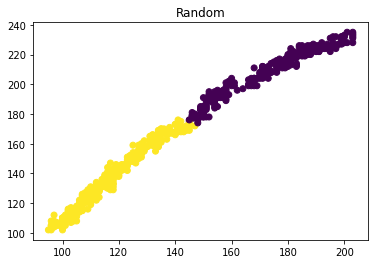

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
random   	0.00s	330659	1.000	1.000	1.000	1.000	1.000	0.631
Centroids [[172.89156627 207.63453815   0.55421687]
 [119.0738255  139.34899329   0.47986577]]


In [176]:
# RANDOM
estimator = KMeans(n_clusters=2, random_state=random_state, init='random')
y_pred = estimator.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Random")
plt.show()

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
      % ('random', 0, estimator.inertia_,
              metrics.homogeneity_score(labels, estimator.labels_),
              metrics.completeness_score(labels, estimator.labels_),
              metrics.v_measure_score(labels, estimator.labels_),
              metrics.adjusted_rand_score(labels, estimator.labels_),
              metrics.adjusted_mutual_info_score(labels, estimator.labels_), 
              metrics.silhouette_score(X, estimator.labels_,
                                       metric='euclidean',
                                       sample_size=n_samples)))

print("Centroids", estimator.cluster_centers_)

1. Utilizando a K-means, realize a clustrização com k=2. Tende descrever os dois grupos gerados. Utilize as informações dos centroides dos clusteres para tentar diferenciar os dois grupos de risco.

Ao usar o K-means com 2 clusters, podemos ver que foram gerados dois grupos homogeneos respeitando seu raio com centro em [172.89156627, 207.63453815, 0.55421687] e [119.0738255, 139.34899329, 0.47986577] respectivamente. Ao descrever o indice de correlação em nosso dataFrame conseguimos observar que o 'Peso' e o 'Colesterol' tem um alto nível de correlação onde se um dele sobe, o outro tende a acompanhar a sua elevação.

Podemos dizer que o grupo de baixo, com baixo Peso e baixo Colesterol são nosso grupo saudável e o de cima, com altos valores de Peso e Colesterol, serão por tanto, nosso grupo de risco.

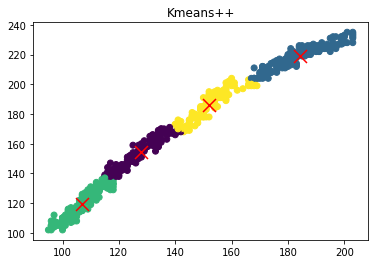

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.00s	81475	0.846	0.422	0.563	0.439	0.562	0.571
Centroids [[127.72592593 154.38518519   0.45925926]
 [184.31818182 218.91558442   0.59090909]
 [106.85       119.53571429   0.54285714]
 [152.09322034 185.90677966   0.44067797]]


In [209]:
# kmaens ++
estimator = KMeans(n_clusters=4, random_state=random_state, init='k-means++')
y_pred = estimator.fit_predict(X)

centroids = estimator.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
# plt.scatter(estimator.cluster_centers_[:, 0], estimator.cluster_centers_[:, 1], s=120, c='red', label = 'Centroids')
plt.scatter(centroids[:, 0], centroids[:, 1],
        marker='x', s=169, linewidths=3,
        color='r', zorder=10)
plt.title("Kmeans++")
plt.show()

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
      % ('k-means++', 0, estimator.inertia_,
              metrics.homogeneity_score(labels, estimator.labels_),
              metrics.completeness_score(labels, estimator.labels_),
              metrics.v_measure_score(labels, estimator.labels_),
              metrics.adjusted_rand_score(labels, estimator.labels_),
              metrics.adjusted_mutual_info_score(labels, estimator.labels_), 
              metrics.silhouette_score(X, estimator.labels_,
                                       metric='euclidean',
                                       sample_size=n_samples)))  
print("Centroids", estimator.cluster_centers_)

2. Vamos tentar encontrar 4 grupos distintos: alto risco possui colesterol e peso altos; baixo risco possui colesterol e peso baixos; e risco moderado possui apenas o peso ou apenas o colesterol altos. Verifique os resultados. Investigue a tabela de centroides e a visão dos dados, além dos gráficos. Defina quais são os limites de peso e de colesterol para que um indivíduo seja considerado paciente de risco.

Como podemos observar, após gerar 4 clusters, temos os grupos definidos e seus centros destacados. considerando zona de risco o Moderado Alto e o Alto Risco (grupos amarelo e azul), podemos definir sua zona de fronteira pela equação [(x1 + x2 / 2), (y1 + y2 / 2)] onde nosso x é o peso e o y o colesterol, para encontrar o ponto de fronteira do tipo Moderado Alto e Risco Alto.

In [208]:
# Moderado Alto

xa1, ya1, xb1, yb1 = [127.72, 154.38, 152.09, 185.90]

resX = (xa1 + xb1)/2
resy = (ya1 + yb1)/2
print("POINT :", (resX, resy))

POINT : (139.905, 170.14)


In [207]:
# Risco Alto

xa1, ya1, xb1, yb1 = [152.09, 185.90, 184.31, 218.91]

resX = (xa1 + xb1)/2
resy = (ya1 + yb1)/2
print("POINT :", (resX, resy))

POINT : (168.2, 202.405)


## Dados normalizados

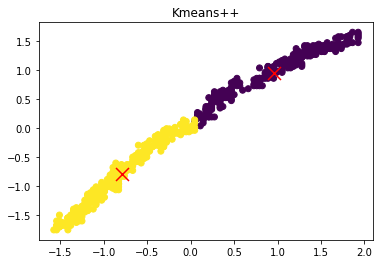

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.00s	809	0.951	0.951	0.951	0.978	0.951	0.447
Centroids [[ 0.95555887  0.954011    0.09358063]
 [-0.79257057 -0.79128671 -0.07761872]]


In [215]:
# kmaens ++
estimator = KMeans(n_clusters=2, random_state=random_state, init='k-means++')
y_pred = estimator.fit_predict(X_scaled)

centroids = estimator.cluster_centers_

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred)
plt.scatter(centroids[:, 0], centroids[:, 1],
        marker='x', s=169, linewidths=3,
        color='r', zorder=10)
plt.title("Kmeans++")
plt.show()

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
      % ('k-means++', 0, estimator.inertia_,
              metrics.homogeneity_score(labels, estimator.labels_),
              metrics.completeness_score(labels, estimator.labels_),
              metrics.v_measure_score(labels, estimator.labels_),
              metrics.adjusted_rand_score(labels, estimator.labels_),
              metrics.adjusted_mutual_info_score(labels, estimator.labels_), 
              metrics.silhouette_score(X_scaled, estimator.labels_,
                                       metric='euclidean',
                                       sample_size=n_samples)))  
print("Centroids", estimator.cluster_centers_)

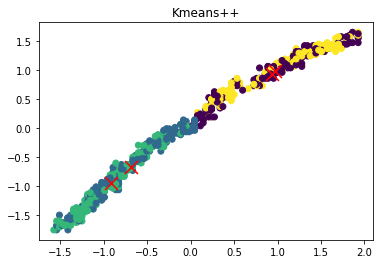

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.00s	257	0.944	0.472	0.629	0.485	0.628	0.588
Centroids [[ 0.93824173  0.92726769  0.97294358]
 [-0.68406458 -0.66200336 -1.02780882]
 [-0.91910884 -0.94113658  0.97294358]
 [ 0.96916188  0.97997531 -1.02780882]]


In [216]:
# kmaens ++
estimator = KMeans(n_clusters=4, random_state=random_state, init='k-means++')
y_pred = estimator.fit_predict(X_scaled)


centroids = estimator.cluster_centers_

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred)
plt.scatter(centroids[:, 0], centroids[:, 1],
        marker='x', s=169, linewidths=3,
        color='r', zorder=10)
plt.title("Kmeans++")
plt.show()

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
      % ('k-means++', 0, estimator.inertia_,
              metrics.homogeneity_score(labels, estimator.labels_),
              metrics.completeness_score(labels, estimator.labels_),
              metrics.v_measure_score(labels, estimator.labels_),
              metrics.adjusted_rand_score(labels, estimator.labels_),
              metrics.adjusted_mutual_info_score(labels, estimator.labels_), 
              metrics.silhouette_score(X_scaled, estimator.labels_,
                                       metric='euclidean',
                                       sample_size=n_samples)))  
print("Centroids", estimator.cluster_centers_)

# Conclusões

Podemos perceber que, após usar o método de normalização Standart do sklearn, observamos uma queda em nosso valor de silhouette porém o gráfico com 2 clusters, permanceu intacto e a comparação entre seus centroides, respeitando suas devidas proporções, ficou compativel de um grafico para outro.

Agora se aplicarmos a normalização e alterarmos o número de clusters para ser compatível com 4 classes, podemos ver que a normalização aumentou em termos de silhouette porém as centroides que desenhou desrespeitaram todo o mapa da estrutura do cluster, apesar de ter uma silhouette maior se subirmos o número de clusters perdemos precisão de agrupamento entre os clusters. 